In [ ]:
#a glance at current hubble catalog
#current criteria used:
#Correctable if spread < bin width and at least 5 points
#uncorrectable if spread > bin width and at least 5 points
#nei if less than 5 points; debiased value may or may not be appropriate
#nei_needs_redshift if we lack redshift values

In [1]:
%pylab inline
import matplotlib.gridspec as gridspec

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import requests
mpl.rcParams['text.usetex']=True
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 



Populating the interactive namespace from numpy and matplotlib


In [2]:
def download_from_dropbox(url):
    
    local_filename = "../data/{:}".format(url.split("/")[-1].split("?")[0])
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                f.flush()
            
    return local_filename

In [3]:
#load Hubble data 
data=Table.read('gz_hubble_catalog_10_6_2015.fits')
#load ferengi data 
ferengi_filename = download_from_dropbox("https://www.dropbox.com/s/2dsnro4r5sa48gb/ferengi_all_weighted_and_meta.fits?dl=1")
f_data = Table.read(ferengi_filename) 

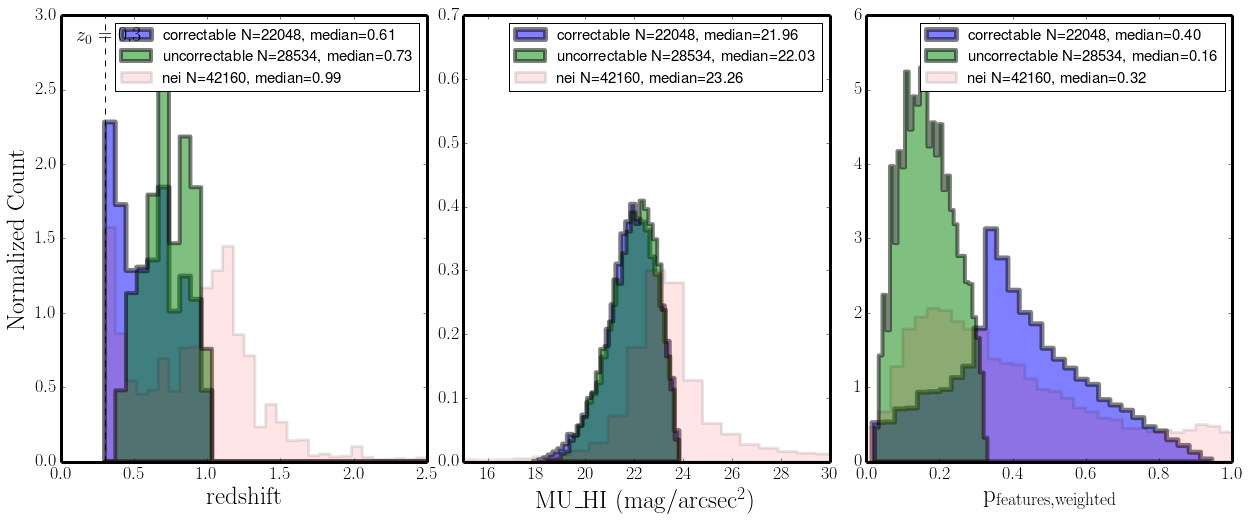

In [4]:
#plot 1D histograms of redshift, surface brightness and p_features of hubble catalog
categories=list(set(data['Correctable_Category']))
categories.remove(categories[3])
categories.remove(categories[3])

#categories=[row.strip() for row in categories]
f=plt.figure(figsize=(21,8))

gs=gridspec.GridSpec(1,3)
gs.update(wspace=0.1)
gs.update(hspace=0)
lws=[5,4,3]
alphas=[.5,.5,.1]
ax1 = plt.subplot(gs[0,0])
for i,c in enumerate(categories):
    z_list=data[data['Correctable_Category']==c]['Z']
    med = np.median(z_list)
    plt.hist(z_list,range=(.3,2.5),label='%sN=%i, median=%.2f'%(c,len(z_list),med),histtype='stepfilled',lw=lws[i],bins=30,alpha=alphas[i],normed=True)
plt.axvline(x=.3,c='k',ls='dashed')
plt.xlim(0,2.5)
plt.legend(prop={'size':15})
plt.ylabel(r'$\mathrm{Normalized~Count}$',fontsize=25)
plt.xlabel(r'$\mathrm{redshift}$',fontsize=25)
ax2 = plt.subplot(gs[0,1])
for i,c in enumerate(categories):
    mu_list=data[data['Correctable_Category']==c]['MU_HI']
    med = np.median(mu_list)
    plt.hist(mu_list,label='%sN=%i, median=%.2f'%(c,len(mu_list),med),histtype='stepfilled',lw=lws[i],bins=30,alpha=alphas[i],normed=True)
plt.ylim(0,.7)
plt.xlim(15,30)
plt.legend(prop={'size':15})
plt.xlabel(r'$\mathrm{MU\textunderscore HI~(mag/arcsec^2)}$',fontsize=25)
ax3 = plt.subplot(gs[0,2])
for i,c in enumerate(categories):
    p_list=data[data['Correctable_Category']==c]['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
    med = np.median(p_list)
    plt.hist(p_list,label='%sN=%i, median=%.2f'%(c,len(p_list),med),histtype='stepfilled',lw=lws[i],bins=30,alpha=alphas[i],normed=True)
plt.xlabel(r'$\mathrm{p_{features,weighted}}$',fontsize=25)
plt.legend(prop={'size':15})
f.text(.135,.85,r'$z_0=0.3$',fontsize=20)
#plt.savefig('images/redshift_mu_p_distribution.pdf')
#plt.savefig('/home/mel/Documents/GZ_HUBBLE/ferengi_debias/gzhubble/writeup/figures/hubble_z_mu_p_distributions.pdf')

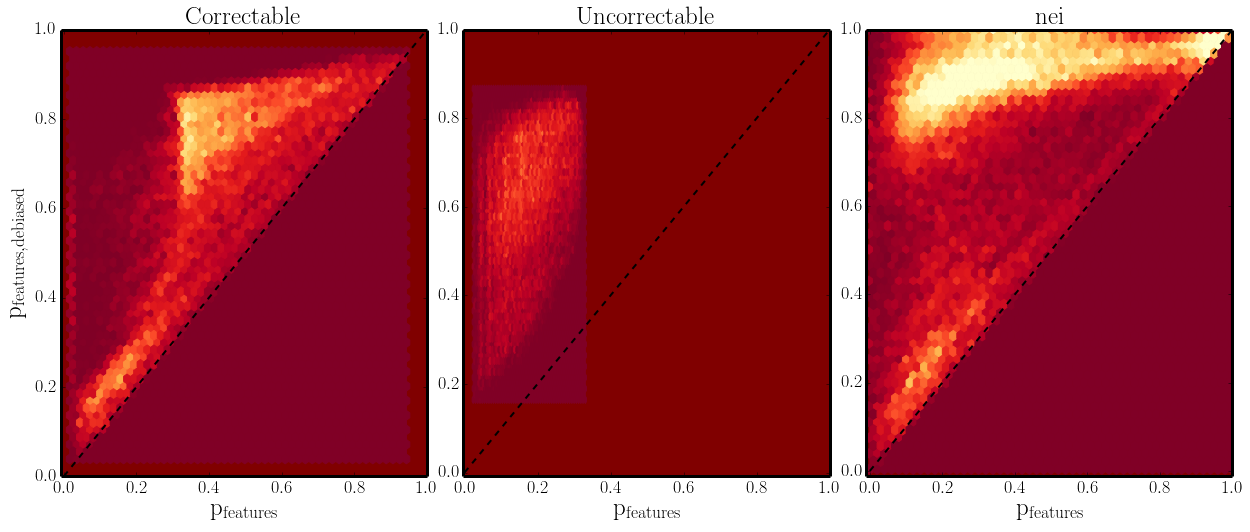

In [5]:
#Plot the change in p_features for the 3 groups
f=plt.figure(figsize=(21,8))

gs=gridspec.GridSpec(1,3)
gs.update(wspace=0.1)
gs.update(hspace=0)

ax1 = plt.subplot(gs[0,0])
weighted_frac=data[data['Correctable_Category']==categories[0]]['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
deb_frac=data[data['Correctable_Category']==categories[0]]['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']
hex1 = ax1.hexbin(weighted_frac,deb_frac, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0,vmax=100)
plt.title(r'$\mathrm{Correctable}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{features}}$',fontsize=25)
plt.ylabel(r'$\mathrm{p_{features,debiased}}$',fontsize=25)
ax1.set_axis_bgcolor('#800000')
plt.ylim(0,1)
ax1.plot([0,1],[0,1],color='k',lw=2,ls='--')

ax2 = plt.subplot(gs[0,1])
weighted_frac=data[data['Correctable_Category']==categories[1]]['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
deb_frac=data[data['Correctable_Category']==categories[1]]['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']
hex2 = ax2.hexbin(weighted_frac,deb_frac, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0,vmax=100)
ax2.set_axis_bgcolor('#800000')
plt.title(r'$\mathrm{Uncorrectable}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{features}}$',fontsize=25)
ax2.plot([0,1],[0,1],color='k',lw=2,ls='--')

ax3 = plt.subplot(gs[0,2])
weighted_frac=data[data['Correctable_Category']==categories[2]]['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
deb_frac=data[data['Correctable_Category']==categories[2]]['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']
hex3 = ax3.hexbin(weighted_frac,deb_frac, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0,vmax=100)
ax3.set_axis_bgcolor('#800000')
plt.title(r'$\mathrm{nei}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{features}}$',fontsize=25)
ax3.plot([0,1],[0,1],color='k',lw=2,ls='--')

#plt.savefig('images/debiased_corrections.pdf')
#plt.savefig('/home/mel/Documents/GZ_HUBBLE/ferengi_debias/gzhubble/writeup/figures/debiased_corrections.pdf')

In [6]:
#purple/green plot for hubble:

yedges_ferengi=list(np.linspace(np.min(f_data['mu_max_i']),np.max(f_data['mu_max_i']),10))
xedges_ferengi=[.25,.35,.45,.55,.65,.75,.85,.95,1.05]
fx_width=xedges_ferengi[1]-xedges_ferengi[0]
fy_width=yedges_ferengi[1]-yedges_ferengi[0]

xedges=np.linspace(0.05,2.05,21)
yedges=[]
yedges.append(yedges_ferengi[0]-fy_width)
for i in range(0,17):
    yedges.append(yedges[-1]+fy_width)

extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
galaxies = set(data['OBJNO'])

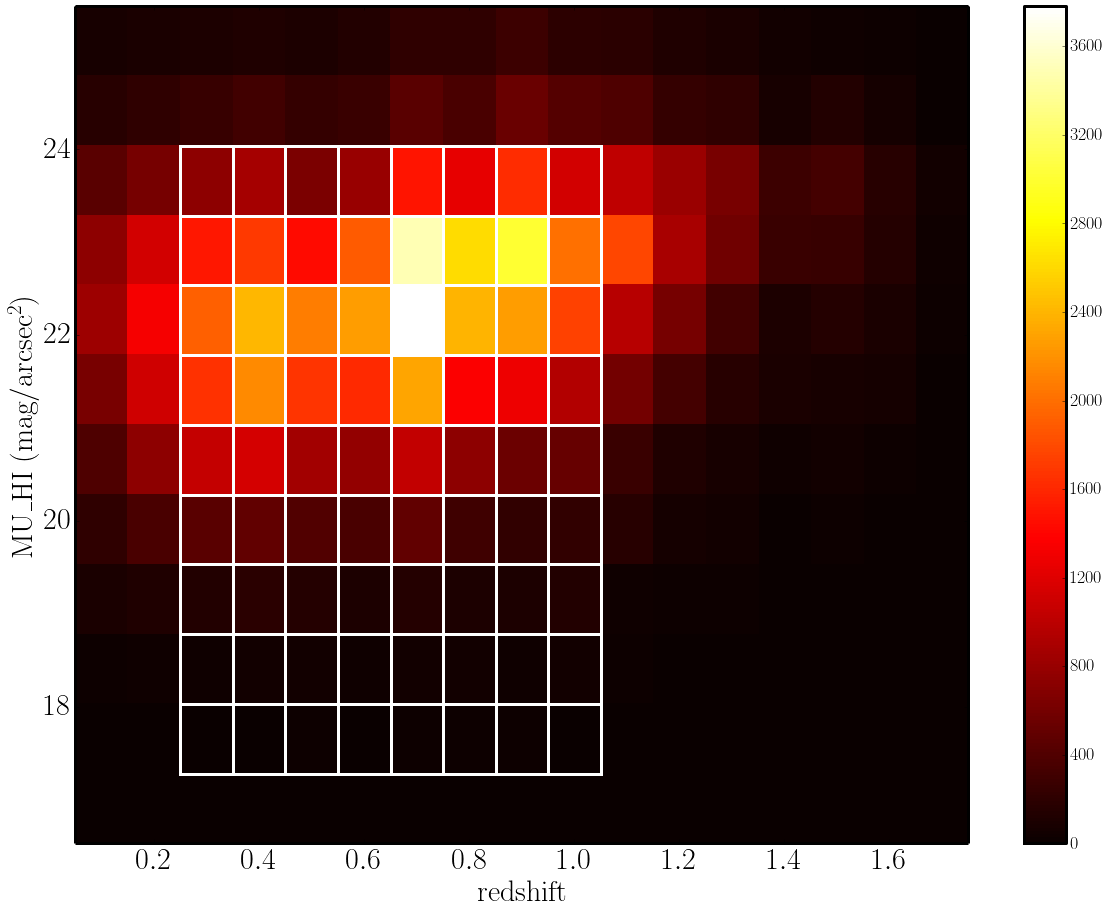

In [7]:
f=plt.figure(figsize=(20,15))
histy,xedges,yedges=np.histogram2d(data['Z'],data['MU_HI'],bins=(xedges,yedges))
plt.imshow(histy.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=cm.hot)
for y in yedges_ferengi:
    plt.plot([xedges_ferengi[0],xedges_ferengi[-1]],[y,y],c='w',lw=3)
for x in xedges_ferengi:
    plt.plot([x,x],[yedges_ferengi[0],yedges_ferengi[-1]],c='w',lw=3)
plt.xlim(xedges[0],xedges[-4])
plt.ylim(yedges[0],yedges[-6])
plt.colorbar()
plt.xlabel(r'$\mathrm{redshift}$',fontsize=30)
plt.ylabel(r'$\mathrm{MU\textunderscore HI~(mag/arcsec^2)}$',fontsize=30)
plt.tick_params(labelsize=30)
#plt.savefig('images/eye_of_sauron.pdf')
#plt.savefig('/home/mel/Documents/GZ_HUBBLE/ferengi_debias/gzhubble/writeup/figures/eye_of_sauron.pdf')

In [8]:
#len(data[data['Correctable_Category']==categories[0]])
correctable=(data['Correctable_Category']==categories[0])
uncorrectable=(data['Correctable_Category']==categories[1])
nei=(data['Correctable_Category']==categories[2])


Plotting debiased vs weighted p_features as a function of surface brightness and redshift:

In [9]:
scatter_dct={}
for z in xedges:
    for edge in yedges:
        scatter_dct[z,edge,'hi']=[]
        scatter_dct[z,edge,'lo']=[]
        scatter_dct[z,edge,'objid']=[]

In [10]:
for x in range(0,len(xedges)-1):
    for y in range(0,len(yedges)-1):
        scatter_dct[xedges[x],yedges[y],'lo']=data[(data['Correctable_Category']==categories[0]) & (data['Z']>=xedges[x]) & (data['Z']<xedges[x+1]) & (data['MU_HI'] >=yedges[y]) & (data['MU_HI'] < yedges[y+1])]['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
        scatter_dct[xedges[x],yedges[y],'hi']=data[(data['Correctable_Category']==categories[0]) & (data['Z']>=xedges[x]) & (data['Z']<xedges[x+1]) & (data['MU_HI'] >=yedges[y]) & (data['MU_HI'] < yedges[y+1])]['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


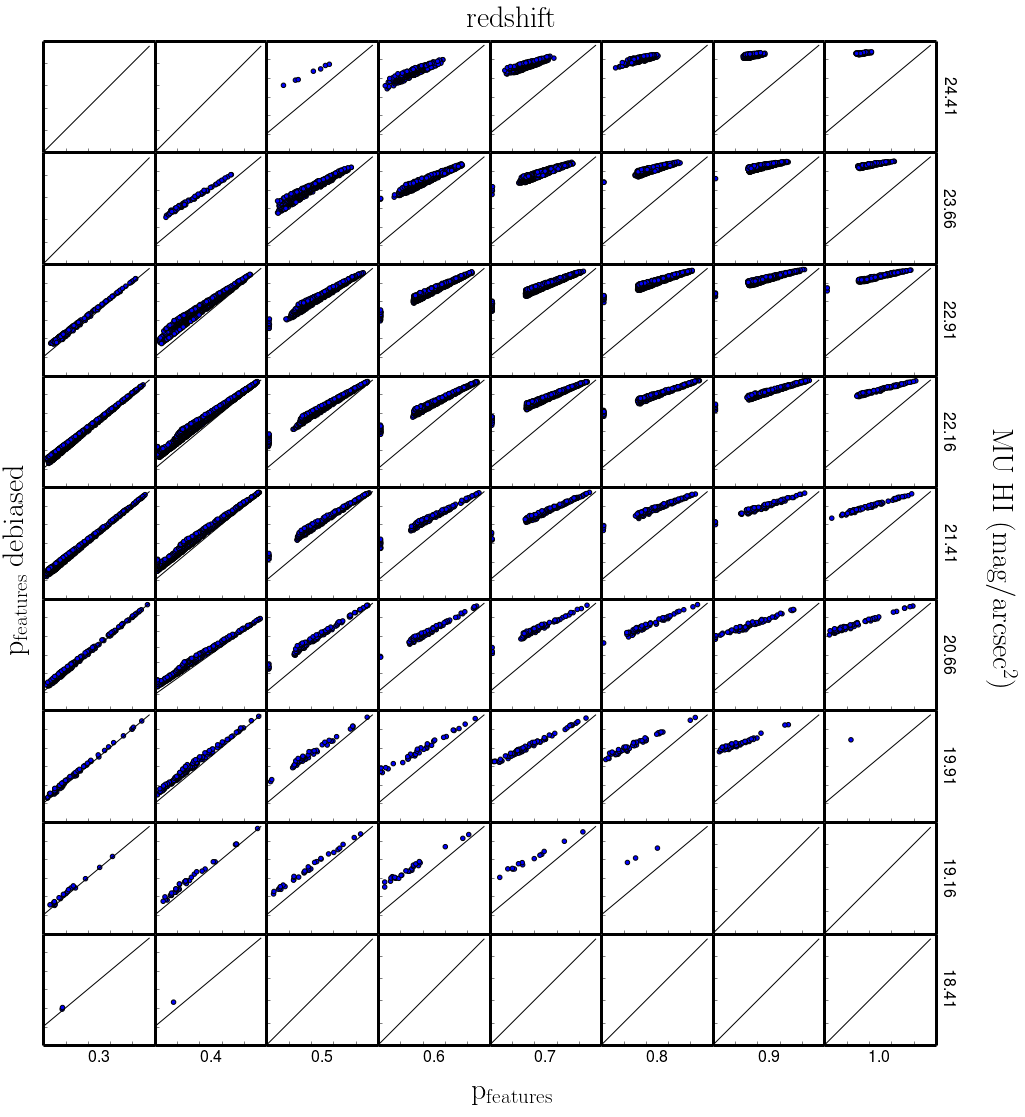

In [13]:
f=figure(figsize=(20,18))
gs=gridspec.GridSpec(9,10)
gs.update(wspace=0)
gs.update(hspace=0)
yedge_int=np.linspace(0,17,18)
yedge_int=yedge_int[::-1]
yedge_int=yedge_int[8:17]
x_new = np.linspace(0,.95,40)

y_label=[]
facecolors=['#af8dc3','#999999','#7fbf7b']
for i in range(0,len(yedges)-1):
    y_label.append(round((yedges[i]+yedges[i+1])/2,2))
y_label=y_label[::-1]

for j,y in enumerate(yedge_int):
    for x in range(2,10):
        ax=plt.subplot(gs[j,x-2])
        xs=scatter_dct[xedges[x],yedges[y],'lo']
        ys=scatter_dct[xedges[x],yedges[y],'hi']
        plt.plot(x_new,x_new,c='k')
        plt.scatter(xs,ys)
        plt.xlim(0,1)
            
        plt.tick_params(labelleft='off')
        plt.tick_params(top='off',right='off',labelbottom='off')

                
        if j==8:
            plt.xlabel('%s'%round((xedges[x]+xedges[x+1])/2,2),fontsize=16)
        if x==9:
            ax.yaxis.set_label_position("right")
            plt.ylabel('%s'%str(y_label[j+6]).rjust(500),fontsize=16,rotation=270,labelpad=20)

f.text(.78,.5,r'$\mathrm{MU~HI~(mag/arcsec^2)}$',rotation=270,fontsize=30,va='center')
f.text(.45,.91,r'$\mathrm{redshift}$',fontsize=30,ha='center')
f.text(.1,.5,r'$\mathrm{p_{features}~debiased}$',rotation=90,fontsize=30,va='center')
f.text(.45,.08,r'$\mathrm{p_{features}}$',fontsize=30,ha='center')


In [ ]:
#isolate galaxies in red sequence
#plot fraction of disks in red sequence vs redshift
#p_features vs redshift? 

(array([ 4023.,  2046.,  5235.,  3926.,  2404.,  2370.,  1018.,   528.,
          263.,    68.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

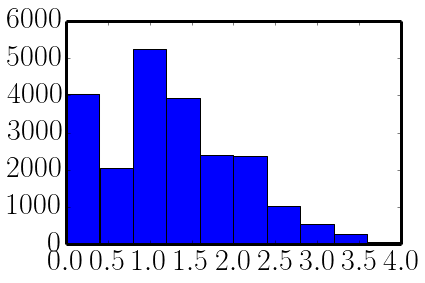

In [37]:
plt.hist(data[correctable]['MAGB']-data[correctable]['MAGI'],range=(0,4))

In [14]:
red_sequence=(data['Correctable_Category']==categories[0]) & ((data['MAGB']-data['MAGI'])> 2) & ((data['MAGB']-data['MAGI']) < 6 )
blue_cloud=(data['Correctable_Category']==categories[0]) & ((data['MAGB']-data['MAGI'])> 0) & ((data['MAGB']-data['MAGI']) <= 2 )

red_sequence_disks=(data['Correctable_Category']==categories[0]) & ((data['MAGB']-data['MAGI'])> 2) & ((data['MAGB']-data['MAGI']) < 6) & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>.5)
blue_cloud_disks=(data['Correctable_Category']==categories[0]) & ((data['MAGB']-data['MAGI'])> 0) & ((data['MAGB']-data['MAGI']) <= 2) & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']<=.5)


/usr/lib/python2.7/dist-packages/astropy/table/table.py:154: RuntimeWarning: invalid value encountered in greater
  return op(self.data, other)
/usr/lib/python2.7/dist-packages/astropy/table/table.py:154: RuntimeWarning: invalid value encountered in less_equal
  return op(self.data, other)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


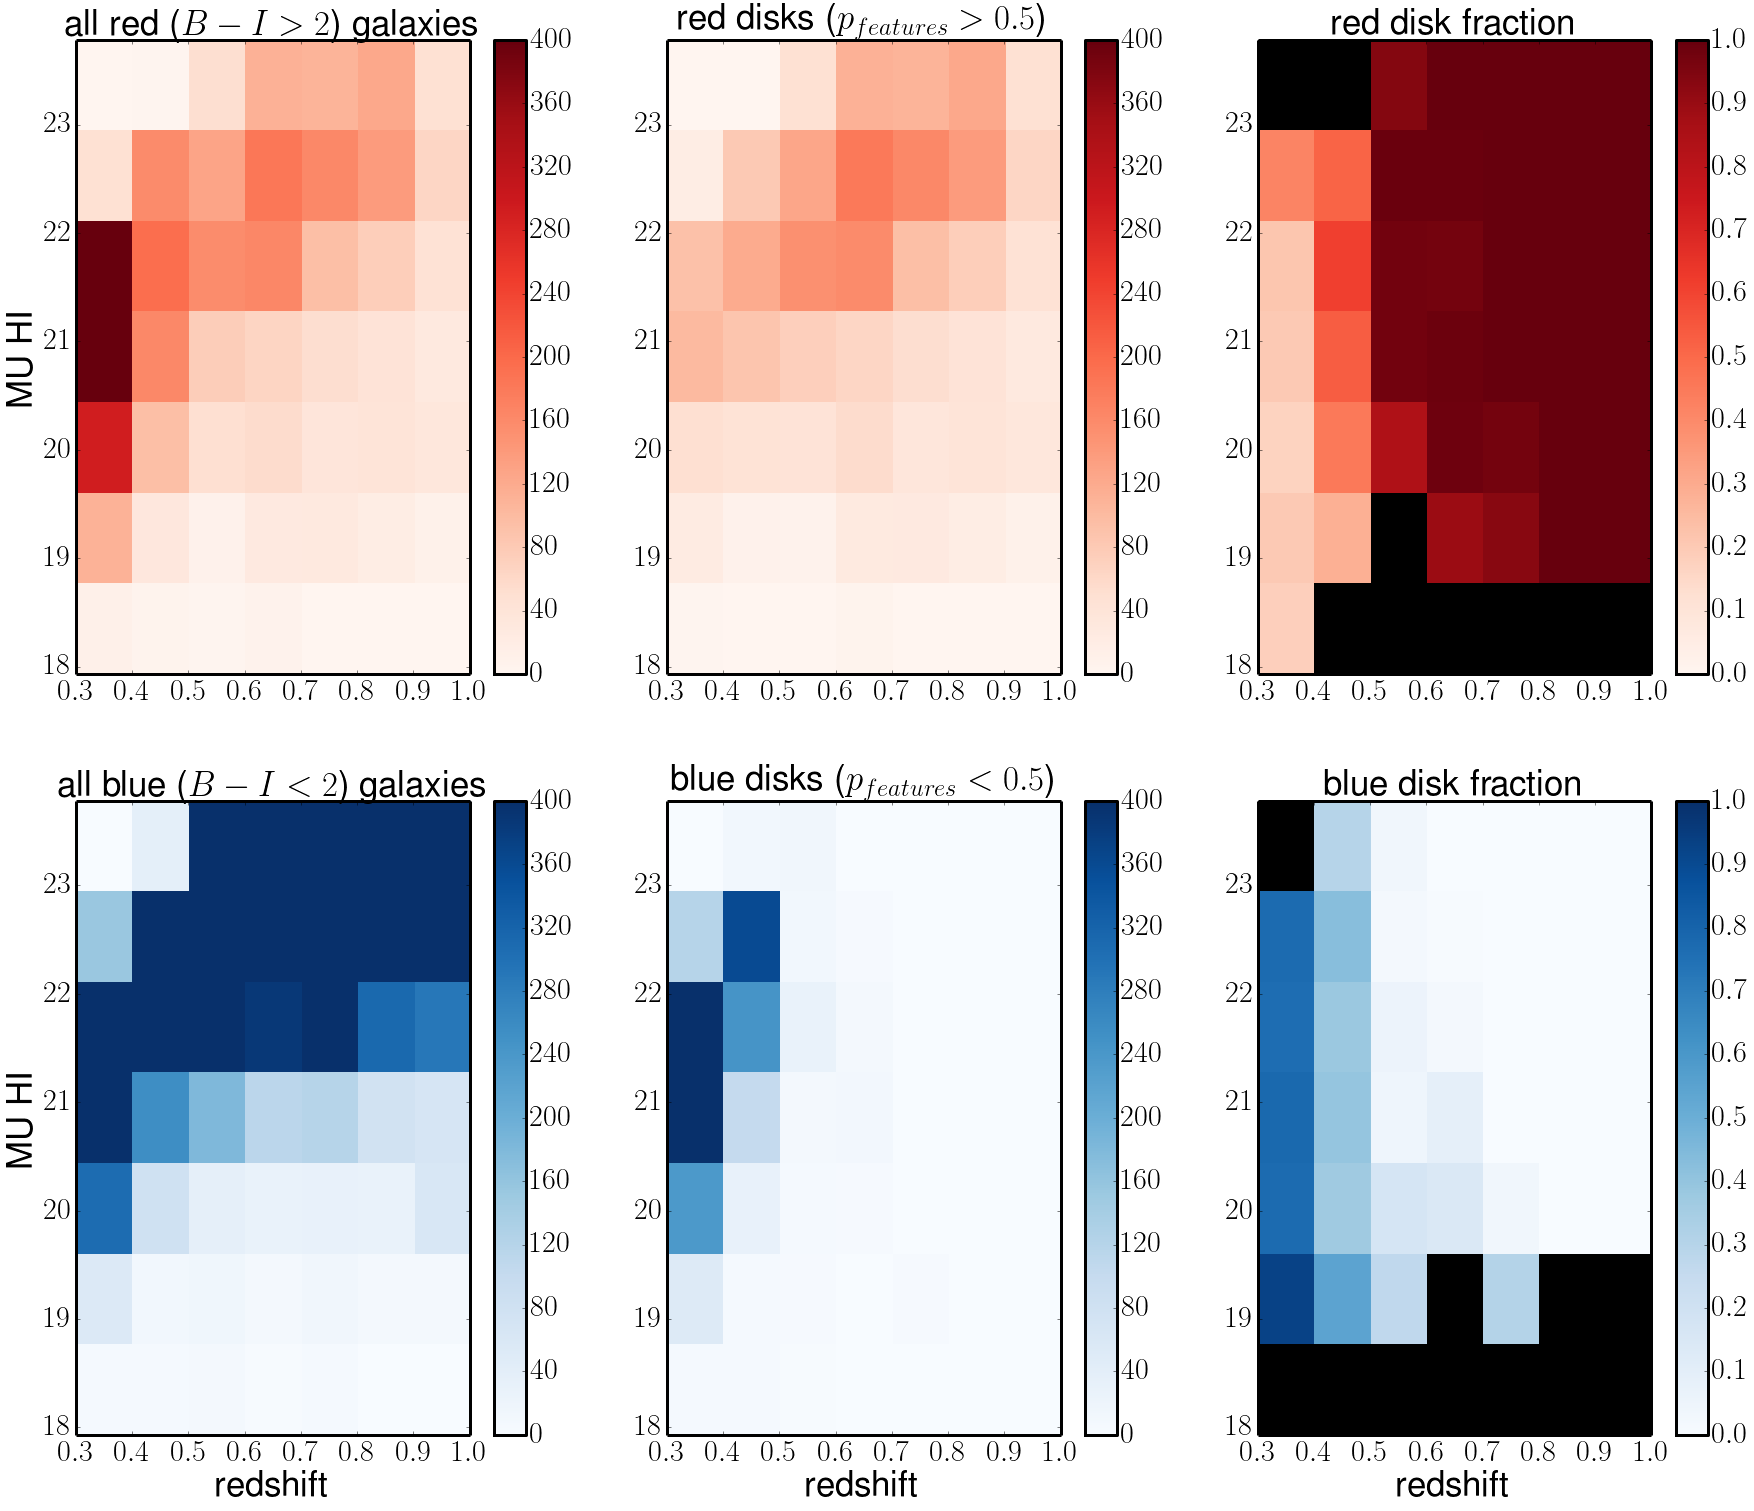

In [31]:
f=plt.figure(figsize=(30,25))
bins=(7,7)
hist_all_red,xedges,yedges=np.histogram2d(data[red_sequence]['Z'],data[red_sequence]['MU_HI'],bins=bins)
hist_all_blue,x,y=np.histogram2d(data[blue_cloud]['Z'],data[blue_cloud]['MU_HI'],bins=(xedges,yedges))
hist_red_disks,x,y=np.histogram2d(data[red_sequence_disks]['Z'],data[red_sequence_disks]['MU_HI'],bins=(xedges,yedges))
hist_blue_disks,x,y=np.histogram2d(data[blue_cloud_disks]['Z'],data[blue_cloud_disks]['MU_HI'],bins=(xedges,yedges))


extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


red_frac_hist=hist_red_disks/hist_all_red
where_are_NaNs = isnan(red_frac_hist)
red_frac_hist[where_are_NaNs] = 0
red_frac_hist = np.ma.array(red_frac_hist,mask=((hist_all_red)<10))

blue_frac_hist=hist_blue_disks/hist_all_blue
where_are_NaNs = isnan(blue_frac_hist)
blue_frac_hist[where_are_NaNs] = 0
blue_frac_hist = np.ma.array(blue_frac_hist,mask=((hist_all_blue)<10))

Redcm=cm.Reds
Redcm.set_bad('black')

Bluecm=cm.Blues
Bluecm.set_bad('black')


gs=gridspec.GridSpec(2,3)

axr=plt.subplot(gs[0,0])
plt.imshow(hist_all_red.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=Redcm,vmin=0,vmax=400)
plt.colorbar()
plt.ylabel('MU~HI',fontsize=35)
plt.title('all~red~($B-I>2$)~galaxies',fontsize=35)
#plt.xlim(.05,1.5)
#plt.ylim(17,25)

axb=plt.subplot(gs[0,1])
plt.imshow(hist_red_disks.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=Redcm,vmin=0,vmax=400)
plt.colorbar()
plt.title('red~disks~($p_{features}>0.5$)',fontsize=35)
#plt.xlim(.05,1.5)
#plt.ylim(17,25)

axb=plt.subplot(gs[0,2])
plt.imshow(red_frac_hist.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=Redcm,vmin=0,vmax=1)
plt.colorbar()
plt.title('red~disk~fraction',fontsize=35)
#plt.xlim(.05,1.5)
#plt.ylim(17,25)

ax4=plt.subplot(gs[1,0])
plt.imshow(hist_all_blue.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=Bluecm,vmin=0,vmax=400)
plt.colorbar()
plt.xlabel('redshift',fontsize=35)
plt.ylabel('MU~HI',fontsize=35)
plt.title('all~blue~($B-I<2$)~galaxies',fontsize=35)

#plt.xlim(.05,1.5)
#plt.ylim(17,25)

ax5=plt.subplot(gs[1,1])
plt.imshow(hist_blue_disks.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=Bluecm,vmin=0,vmax=400)
plt.colorbar()
plt.title('blue~disks~($p_{features}<0.5$)',fontsize=35)
plt.xlabel('redshift',fontsize=35)

#plt.xlim(.05,1.5)
#plt.ylim(17,25)

ax6=plt.subplot(gs[1,2])
plt.imshow(blue_frac_hist.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=Bluecm,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel('redshift',fontsize=35)
plt.title('blue~disk~fraction',fontsize=35)
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30

#plt.xlim(.05,1.5)
#plt.ylim(17,25)